# Audubon in Action: Creative Approaches in Data

During [Earth Week Data Jam](https://www.library.upenn.edu/about/exhibits-events/earth-week-data-jam), join Penn Libraries' Research Data and Digital Scholarship team (and friends) as we create, analyze, visualize, and experiment with data related to environmental issues and the natural world. Whether you're interested in learning how to decode professional data visualizations, working with qualitative data, or building your own data set from the ground up, we hope you find something that meets your needs.

In this notebook, we'll create mosaics, Instagram posts, and a sound file for one of the birds in the [Birds of Philadelphia](https://www.inaturalist.org/projects/birds-of-philadelphia) iNaturalist dataset. Try building these output for all birds [here](link to the site).

[See here](link to blog post) for an introduction to this project.

* [Import What We Need](#Import-What-We-Need)
* [Load the Data](#Load-the-Data)
* [Build a Mosaic](#Build-a-Mosaic)
* [Build an Instagram Post](#Build-an-Instagram-Post)
* [Build a Sound File](#Build-a-Sound-File)
* [Credits](#Credits)

## Import What We Need

Choose out of this list of birds:
* American Bittern
* American Coot
* American Crow
* American Goldfinch
* American Redstart
* American Robin
* American Woodcock
* Baltimore Oriole
* Barn Swallow
* Barnacle Goose
* Barred Owl
* Bay-breasted Warbler
* Belted Kingfisher
* Black Tern
* Black-billed Cuckoo
* Black-headed Gull
* Black-throated Blue Warbler
* Black-throated Green Warbler
* Blackburnian Warbler
* Blue Grosbeak
* Blue Jay
* Blue-winged Teal
* Broad-winged Hawk
* Brown Creeper
* Canada Goose
* Canada Warbler
* Chestnut-sided Warbler
* Chipping Sparrow
* Common Gallinule
* Connecticut Warbler
* Double-crested Cormorant
* Downy Woodpecker
* Evening Grosbeak
* Field Sparrow
* Fish Crow
* Glossy Ibis
* Golden-winged Warbler
* Great Blue Heron
* Great Crested Flycatcher
* Great Horned Owl
* Green Heron
* Green-winged Teal
* Hairy Woodpecker
* Hermit Thrush
* Herring Gull
* Hooded Merganser
* Hooded Warbler
* Horned Grebe
* House Wren
* Least Bittern
* Long-eared Owl
* Long-tailed Duck
* Marsh Wren
* Nashville Warbler
* Olive-sided Flycatcher
* Orange-crowned Warbler
* Orchard Oriole
* Palm Warbler
* Pectoral Sandpiper
* Pileated Woodpecker
* Prairie Warbler
* Prothonotary Warbler
* Purple Finch
* Purple Gallinule
* Purple Martin
* Red Phalarope
* Red-breasted Merganser
* Red-breasted Nuthatch
* Red-eyed Vireo
* Red-headed Woodpecker
* Red-shouldered Hawk
* Red-tailed Hawk
* Ring-necked Duck
* Rose-breasted Grosbeak
* Ruddy Duck
* Ruffed Grouse
* Sanderling
* Semipalmated Sandpiper
* Sharp-shinned Hawk
* Snow Goose
* Snowy Owl
* Solitary Sandpiper
* Song Sparrow
* Spotted Sandpiper
* Swamp Sparrow
* Tennessee Warbler
* Virginia Rail
* White Ibis
* White-crowned Sparrow
* White-throated Sparrow
* Wild Turkey
* Winter Wren
* Wood Thrush
* Worm-eating Warbler
* Yellow-billed Cuckoo
* Yellow-breasted Chat
* Yellow-throated Vireo
* Yellow-throated Warbler

In [5]:
# For use in the workshop - building for people to run through on their own with one selected bird
!pip install -r requirements.txt
your_name = input("Include your name for credit: ")
your_bird = input("Select a bird name from the list of birds above: ")

ERROR: Could not find a version that satisfies the requirement os (from versions: none)
ERROR: No matching distribution found for os
Include your name for credit: Emily Esten
Select a bird name from the list of birds above: Wood Thrush


## Load the Data

In [6]:
# load pa_birds
import pandas as pd
import os
import subprocess
from PIL import Image  
from PIL import ImageFont
from PIL import ImageDraw
from pydub import AudioSegment
import os, random
import pandas as pd
import numpy as np
import os
from IPython.display import Image
import datetime
from datetime import date

directory_path = os.getcwd()
pa_birds = pd.read_csv("data/processed_philly_birds_data.csv")
pa_birds = pa_birds[pa_birds['common_name']==your_bird].reset_index()
pa_birds

index  plate_no    bird_name                           audubon_img  \
0     29  plate-73  wood-thrush  plates/1-99/plate-73-wood-thrush.jpg   

  in_dataset       inaturalist_folder                mosaic_img  common_name  \
0        Yes  inaturalist/wood-thrush  mosaics/wood-thrush.jpeg  Wood Thrush   

   count       scientific_name                         place_guess  \
0     27  Hylocichla mustelina  Fitzwater St, Philadelphia, PA, US   

  observed_on                  display_img  
0  2021-10-07  displays/brown-creeper.jpeg

## Build a Mosaic

reading input folder...
Invalid image: /Users/estene/Documents/GitHub/audubon/inaturalist/wood-thrush/.DS_Store
starting photomosaic creation...
resizing images...
max tile dims: (48, 58)
processed 1000 of 10000...
processed 2000 of 10000...
processed 3000 of 10000...
processed 4000 of 10000...
processed 5000 of 10000...
processed 6000 of 10000...
processed 7000 of 10000...
processed 8000 of 10000...
processed 9000 of 10000...
saved output to /Users/estene/Documents/GitHub/audubon/mosaics/wood-thrush.jpeg
done.


Mosaic_Creator.py:105: SyntaxWarning: "is" with a literal. Did you mean "=="?
  if count > 0 and batch_size > 10 and count % batch_size is 0:


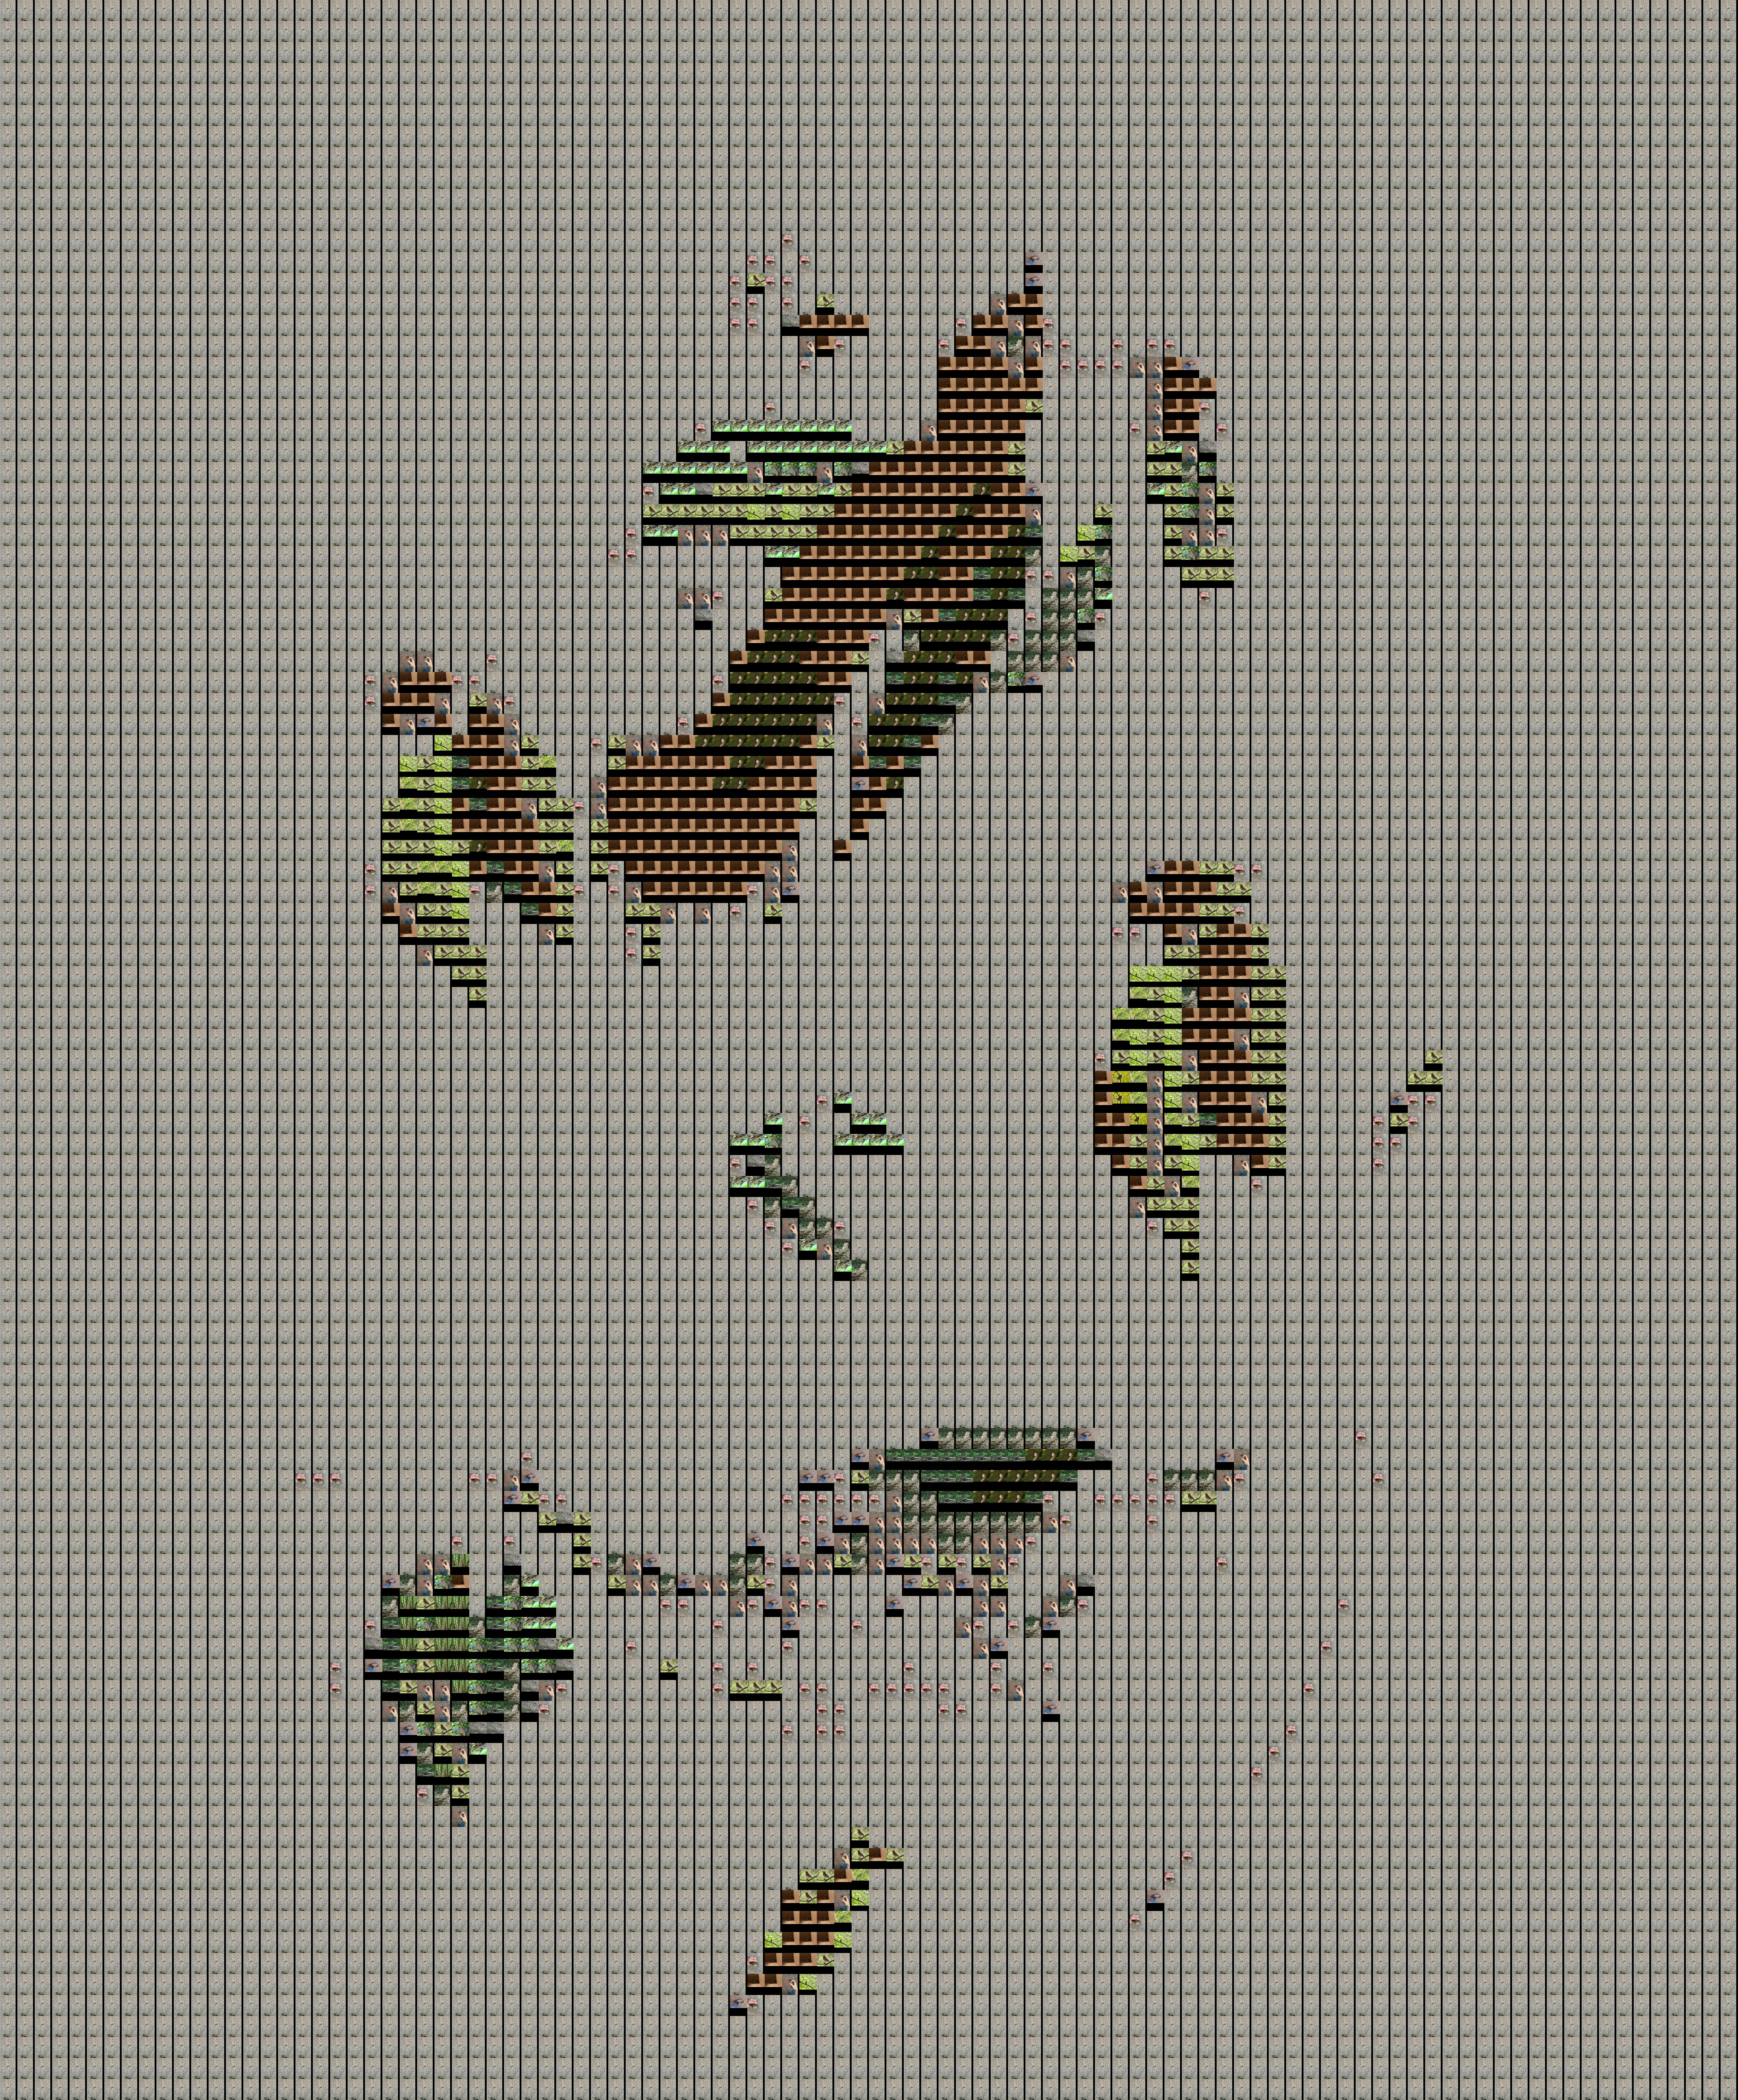

In [15]:
# to build mosaic

file = open("mosaic_commands.txt","w+")
for i in range(0,pa_birds.shape[0]):
    common_name = pa_birds['common_name'].iloc[i]
    target = pa_birds['audubon_img'].iloc[i]
    images = pa_birds['inaturalist_folder'].iloc[i]
    output = pa_birds['mosaic_img'].iloc[i]
    #output = "mosaics/" + common_name + ".jpeg"
    pa_birds.at[i,'mosaic_img'] = f'{directory_path}/' + output
    command = "python Mosaic_Creator.py --target " + target + " --images " + images + " --grid 100 100 --output " + output
    subprocess.run([command],shell=True)
    file.write(command + '\n')
file.close()

Image(filename=output) 

## Build an Instagram Post

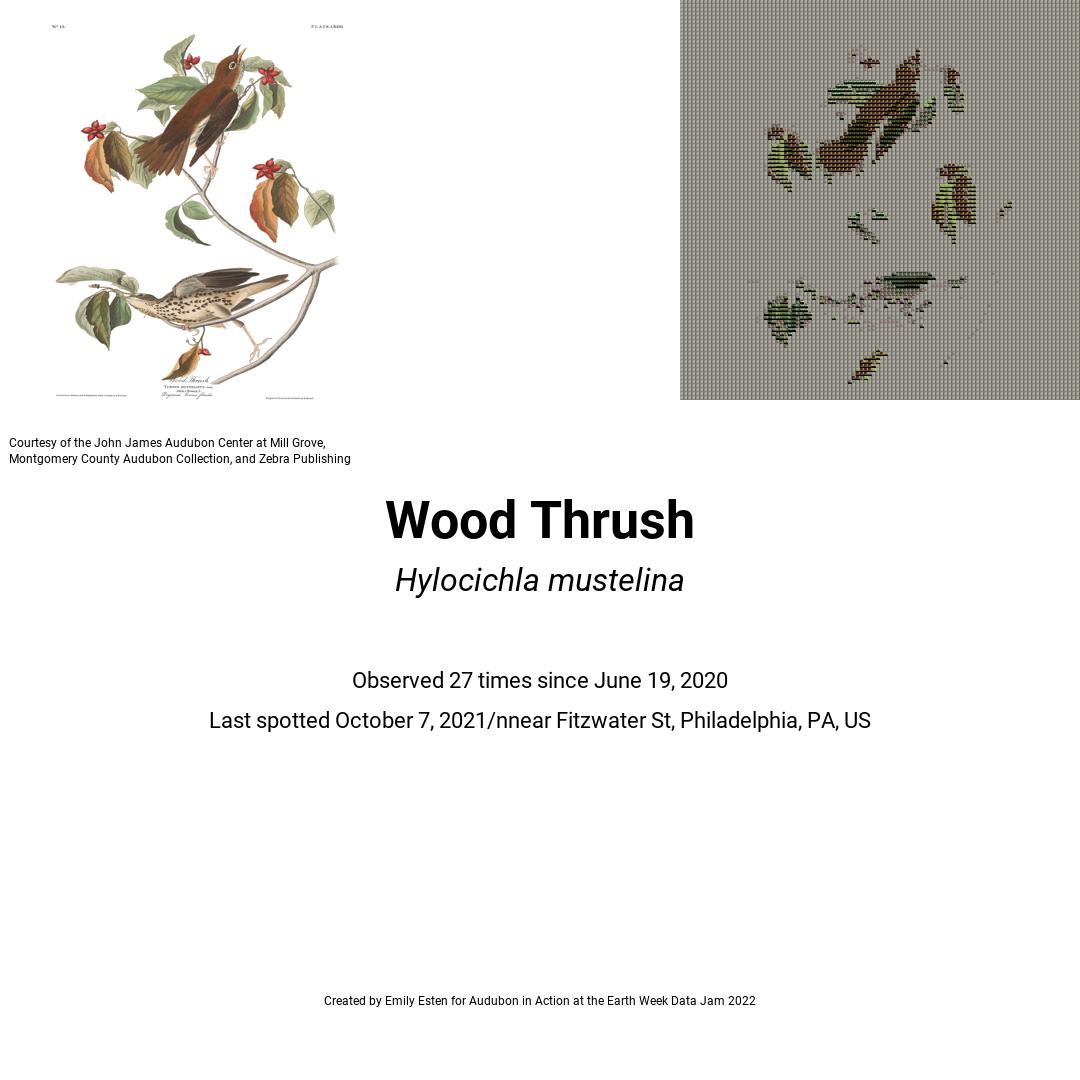

In [14]:
# to build display

from PIL import Image  
from PIL import ImageFont
from PIL import ImageDraw
import datetime
import re

width = 1080
height = 1080

#pa_birds2['display_img'] = ''
for idx, row in pa_birds.iterrows():
    first_line = row.common_name
    second_line = row.scientific_name
    third_line = "Observed " + str(row['count']) + " times since June 19, 2020" # correct this
    
    obs = row.observed_on # double check that this works
    obs = datetime.datetime.strptime(obs,'%Y-%m-%d')
    obs = obs.strftime("%B %e, %Y")
    obs = re.sub(' +', ' ', obs)
    #print(obs)
    
    fourth_line = "Last spotted " + str(obs) + " near " + row.place_guess
    fifth_line = "Created by "+ your_name + " for Audubon in Action at the Earth Week Data Jam 2022"
    orig_image = f'{directory_path}/' + row.audubon_img
    created_image = row.mosaic_img
    output = f'{directory_path}/displays/' + row.bird_name + ".jpeg"
    #pa_birds2['display_img'] = 'displays/' + row.bird_name + ".jpeg"

    img  = Image.new(mode = "RGB", size = (width, height), color = (255,255,255))
    img1 = Image.open(orig_image)
    img2 = Image.open(created_image)
    img1 = img1.resize((400,400))
    img2 = img2.resize((400,400))
    img.paste(img1, (0,0))
    img.paste(img2, (680,0))
    
    draw = ImageDraw.Draw(img)
    font = ImageFont.truetype(f"{directory_path}/fonts/Roboto/Roboto-Regular.ttf", size=12)
    credit = "Courtesy of the John James Audubon Center at Mill Grove,\nMontgomery County Audubon Collection, and Zebra Publishing"
    draw.text((180,450), credit, (0,0,0), font=font, anchor="mm", align="left")
    
    font = ImageFont.truetype(f"{directory_path}/fonts/Roboto/Roboto-Bold.ttf", size=52)
    draw.text((540,520), first_line, (0,0,0), font=font, anchor="mm", align="center")

    font = ImageFont.truetype(f"{directory_path}/fonts/Roboto/Roboto-Italic.ttf", size=32)
    draw.text((540,580), second_line, (0,0,0), font=font, anchor="mm", align="center")

    font = ImageFont.truetype(f"{directory_path}/fonts/Roboto/Roboto-Regular.ttf", size=22)
    draw.text((540,680), third_line, (0,0,0), font=font, anchor="mm", align="center")

    font = ImageFont.truetype(f"{directory_path}/fonts/Roboto/Roboto-Regular.ttf", size=22)
    draw.text((540,720), fourth_line, (0,0,0), font=font, anchor="mm", align="center")

    font = ImageFont.truetype(f"{directory_path}/fonts/Roboto/Roboto-Regular.ttf", size=12)
    draw.text((540,1000), fifth_line, (0,0,0), font=font, anchor="mm", align="center")

    img.save(output)

Image(filename=output) 

## Build a Sound File

In [17]:
# to build sound
combined = AudioSegment.silent(duration=1)
directory_path = os.getcwd()

inaturalist_data = pd.read_csv("data/observations-218728.csv") # need to add most recent data
list_of_licenses = ['CC-BY-NC', 'CC-BY-NC-SA', 'CC-BY', 'CC0', 'CC-BY-SA', 'CC-BY-NC-ND']
inaturalist_data = inaturalist_data.loc[inaturalist_data['license'].isin(list_of_licenses)]
inaturalist_data = inaturalist_data[inaturalist_data['common_name']==your_bird].reset_index() 
dates = inaturalist_data['observed_on'].to_list()
start_date = datetime.datetime.strptime("2021-9-4",'%Y-%m-%d')

# get a list of day count for all the dates represented in inaturalist 
days_dates = {}
for day in dates: 
    end_date = datetime.datetime.strptime(day, '%Y-%m-%d')
    delta = end_date - start_date
    days_dates[delta.days] = day
#print(days_dates)

{-1582: '2017-05-06', -1211: '2018-05-12', -862: '2019-04-26', -839: '2019-05-19', -490: '2020-05-02', -482: '2020-05-10', -479: '2020-05-13', -461: '2020-05-31', -458: '2020-06-03', -441: '2020-06-20', -343: '2020-09-26', -128: '2021-04-29', -124: '2021-05-03', -126: '2021-05-01', -104: '2021-05-23', -103: '2021-05-24', -51: '2021-07-15', -50: '2021-07-16', 21: '2021-09-25', -2675: '2014-05-09', 30: '2021-10-04', 33: '2021-10-07'}


In [ ]:
from pydub.playback import play
res = int(list(days_dates.keys())[0])
all_sounds = AudioSegment.silent(duration=1)
all_sounds.duration_seconds == int(delta.days)

for i in range(res,int(delta.days)):
    print(i)
    if i in days_dates.keys():
        print("yes")
        value = days_dates[i]
        spotted_birds = inaturalist_data[inaturalist_data['observed_on']==value].reset_index()
        print(spotted_birds.shape[0])
        common_name = spotted_birds['common_name'].loc[spotted_birds.index[0]]
        print(common_name)
        bird_name = common_name.lower()
        bird_name = '-'.join(bird_name.split())
        sounds_folder = f'{directory_path}/sounds/' + bird_name
        sound_file = random.choice(os.listdir(sounds_folder))
        sound_type = sound_file.rsplit('.')[1]
        sound_file = sounds_folder + "/" + sound_file
        print(sound_file)
        sound = AudioSegment.from_file(sound_file, sound_type)
        sound = sound[1000:2000]
        #play(sound)
        combined = sound + 10
        #combined = AudioSegment.silent(duration=1000)
        multiplier = 1
        for idx, row in spotted_birds[1:].iterrows(): 
            common_name = spotted_birds['common_name'].loc[spotted_birds.index[idx]]
            bird_name = common_name.lower()
            bird_name = '-'.join(bird_name.split())
            sounds_folder = f'{directory_path}/sounds/' + bird_name
            sound_file = random.choice(os.listdir(sounds_folder))
            sound_type = sound_file.rsplit('.')[1]
            sound_file = sounds_folder + "/" + sound_file
            sound = AudioSegment.from_file(sound_file, sound_type)
            sound = sound[1000:2000]
            sound = sound + (15*multiplier)
            combined.overlay(sound)
    else:
        print("no")
        combined = AudioSegment.silent(duration=1000)
    all_sounds = all_sounds + combined
all_sounds.export("sounds/output.mp3", format="mp3")
print("sound created!")

-1582
yes
1
Wood Thrush
/Users/estene/Documents/GitHub/audubon/sounds/wood-thrush/48077306.wav
-1581
no
-1580
no
-1579
no
-1578
no
-1577
no
-1576
no
-1575
no
-1574
no
-1573
no
-1572
no
-1571
no
-1570
no
-1569
no
-1568
no
-1567
no
-1566
no
-1565
no
-1564
no
-1563
no
-1562
no
-1561
no
-1560
no
-1559
no
-1558
no
-1557
no
-1556
no
-1555
no
-1554
no
-1553
no
-1552
no
-1551
no
-1550
no
-1549
no
-1548
no
-1547
no
-1546
no
-1545
no
-1544
no
-1543
no
-1542
no
-1541
no
-1540
no
-1539
no
-1538
no
-1537
no
-1536
no
-1535
no
-1534
no
-1533
no
-1532
no
-1531
no
-1530
no
-1529
no
-1528
no
-1527
no
-1526
no
-1525
no
-1524
no
-1523
no
-1522
no
-1521
no
-1520
no
-1519
no
-1518
no
-1517
no
-1516
no
-1515
no
-1514
no
-1513
no
-1512
no
-1511
no
-1510
no
-1509
no
-1508
no
-1507
no
-1506
no
-1505
no
-1504
no
-1503
no
-1502
no
-1501
no
-1500
no
-1499
no
-1498
no
-1497
no
-1496
no
-1495
no
-1494
no
-1493
no
-1492
no
-1491
no
-1490
no
-1489
no
-1488
no
-1487
no
-1486
no
-1485
no
-1484
no
-1483
no
-1482
no
-1481

-665
no
-664
no
-663
no
-662
no
-661
no
-660
no
-659
no
-658
no
-657
no
-656
no
-655
no
-654
no
-653
no
-652
no
-651
no
-650
no
-649
no
-648
no
-647
no
-646
no
-645
no
-644
no
-643
no
-642
no
-641
no
-640
no
-639
no
-638
no
-637
no
-636
no
-635
no
-634
no
-633
no
-632
no
-631
no
-630
no
-629
no
-628
no
-627
no
-626
no
-625
no
-624
no
-623
no
-622
no
-621
no
-620
no
-619
no
-618
no
-617
no
-616
no
-615
no
-614
no
-613
no
-612
no
-611
no
-610
no
-609
no
-608
no
-607
no
-606
no
-605
no
-604
no
-603
no
-602
no
-601
no
-600
no
-599
no
-598
no
-597
no
-596
no
-595
no
-594
no
-593
no
-592
no
-591
no
-590
no
-589
no
-588
no
-587
no
-586
no
-585
no
-584
no
-583
no
-582
no
-581
no
-580
no
-579
no
-578
no
-577
no
-576
no
-575
no
-574
no
-573
no
-572
no
-571
no
-570
no
-569
no
-568
no
-567
no
-566
no
-565
no
-564
no
-563
no
-562
no
-561
no
-560
no
-559
no
-558
no
-557
no
-556
no
-555
no
-554
no
-553
no
-552
no
-551
no
-550
no
-549
no
-548
no
-547
no
-546
no
-545
no
-544
no
-543
no
-542
no
-541
no


Input #0, wav, from '/var/folders/kl/0dwxwfpd25xdhw1l6w4r3pbr0000gs/T/tmp8jjf4gwp.wav':
  Duration: 00:26:54.87, bitrate: 768 kb/s
  Stream #0:0: Audio: pcm_s16le ([1][0][0][0] / 0x0001), 48000 Hz, 1 channels, s16, 768 kb/s


In [ ]:
all_sounds

## Credits

Created by [Emily Esten](https://www.library.upenn.edu/people/staff/emily-esten) for Earth Week Data Jam 2022.

The Center for Research Data and Digital Scholarship facilitates data-driven and data-literate research and scholarship across the disciplines in order to foster informed and ethical data communites at Penn. Interested in data, computational research, digital humanities, or open and public scholarship? Find us on the [Penn Libraries website](https://www.library.upenn.edu/help-with/research-data-digital-scholarship). 